In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/dell/Downloads/100-days-of-machine-learning-main/day25-normalization/wine_data.csv",usecols=[0,1,2],names=["CLass label","Alcohol","Malic acid"])

In [5]:
df

,CLass label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

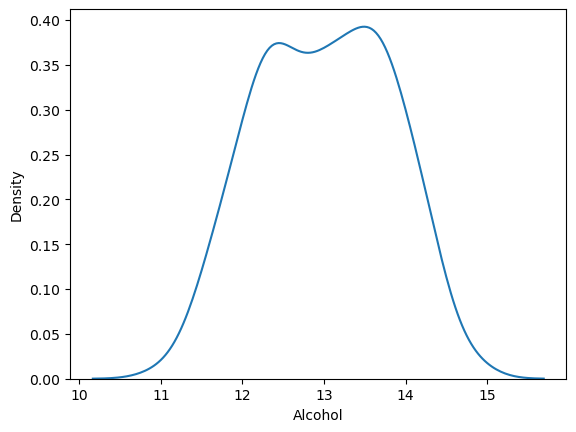

In [6]:
sns.kdeplot(x="Alcohol",data=df)

<Axes: xlabel='Malic acid', ylabel='Density'>

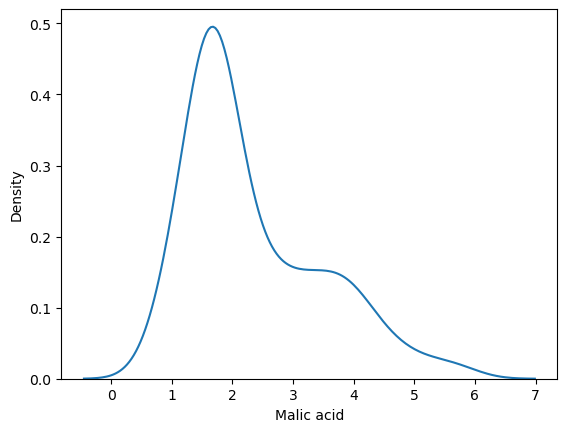

In [7]:
sns.kdeplot(x="Malic acid",data=df)

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

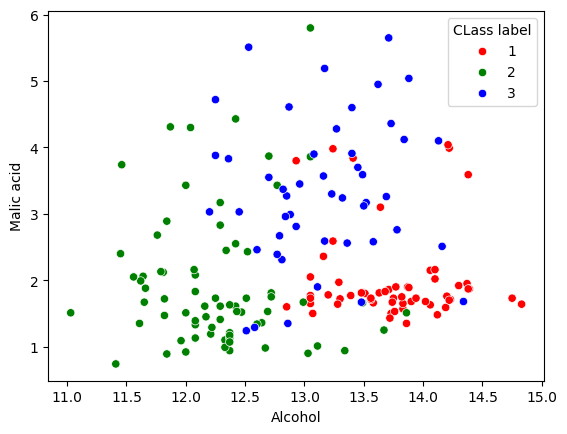

In [10]:
color_dict={1:"red",2:"green",3:"blue"}
sns.scatterplot(x="Alcohol",y="Malic acid",data=df,hue="CLass label",palette=color_dict)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop("CLass label",axis=1),df["CLass label"],test_size=0.3,random_state=0)

In [14]:
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [21]:
X_train.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,12.983065,2.383710
std,0.801340,1.136696
min,11.030000,0.890000
25%,12.362500,1.607500
50%,13.040000,1.885000
75%,13.640000,3.247500
max,14.750000,5.650000


In [24]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [25]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [26]:
X_train_scaled.describe()

,Alcohol,Malic acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


In [27]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


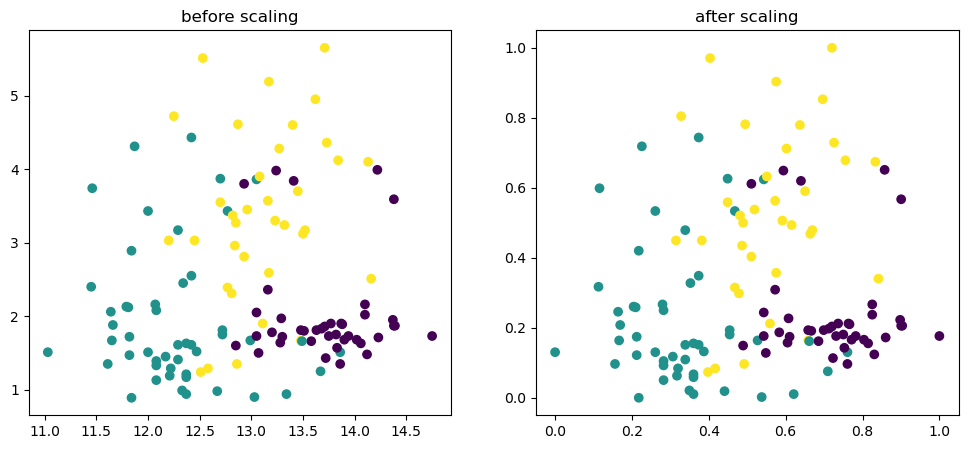

In [29]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train["Alcohol"],X_train["Malic acid"],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(X_train_scaled["Alcohol"],X_train_scaled["Malic acid"],c=y_train)
ax2.set_title("after scaling")
plt.show()

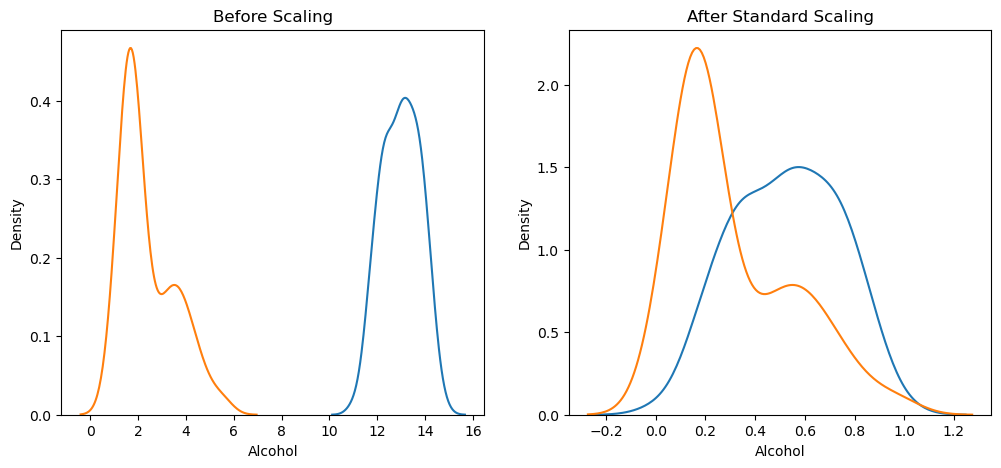

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

<Axes: xlabel='Alcohol', ylabel='Density'>

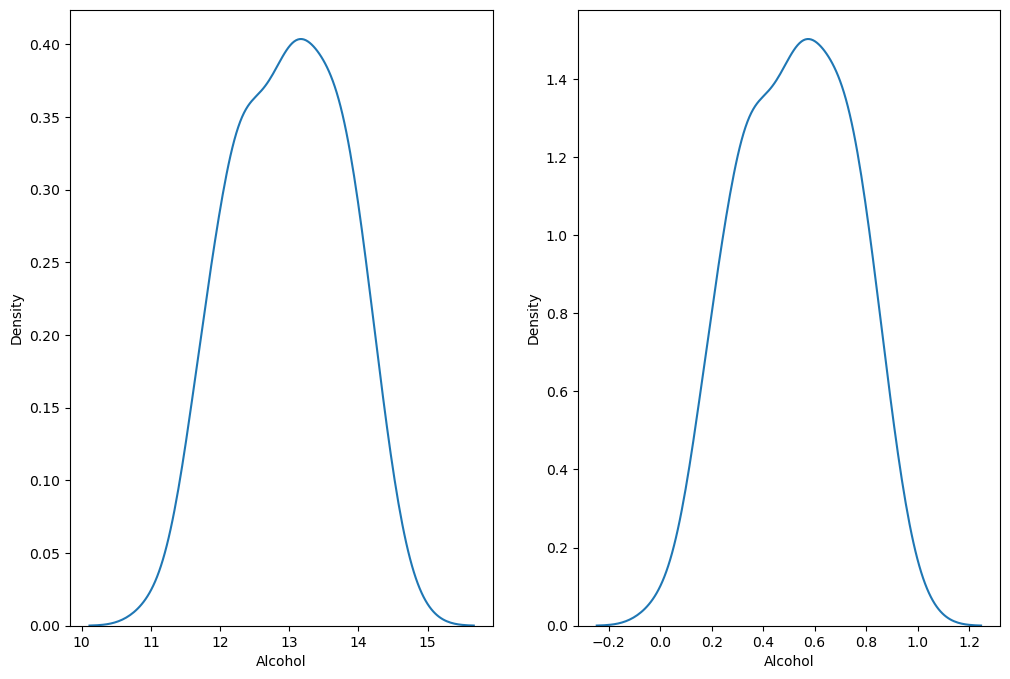

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,8))
sns.kdeplot(X_train["Alcohol"],ax=ax1)
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)